In [2]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import matplotlib
import pandas as pd

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [3]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/plot.py'>

In [4]:
samples_path = '../data/OUTPUT/mcm/sample_sizes_fromfull/'
fname = 'MCMs_'

In [18]:
# 2. For a sample size, compute the fraction of correct members in the group of each icc
# that is get the partition map and check fraction overlap between rows in where the 1s are excluding diagonal
nr_runs = 50
digit = 0

# sample_sizes = [10, 1000 ,2000,3000, 5423]
sample_sizes = [10, 1000 ,2000,3000, 6315]

coo_sum = np.empty((5,121,121),dtype=int)
mcm_all_com = []
for s, sample_size in enumerate(sample_sizes):
    # load runs
    mcm_sample = []
    mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
    for i in range(nr_runs): #len(os.listdir(mcms_path))):
        with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
                mcm_sample.append(json.load(f))
    mcm_0_multisample = np.array([myplot.create_cooccurance_matrix(mcm_sample[i][digit]) for i in range(nr_runs)],dtype=int)
    coo_sum[s,:,:] = np.sum(mcm_0_multisample,axis=0)
    mcm_all_com.append(mcm_sample)




Standard Deviation per Row at 5423:
[120  11   1  22   0  33 110  10 119   2 109 111  99  12   3  44   5   4
   7  18 118  17   6 108  98  50  23  27  29   9  62  55  21 103  57  28
  88  85 100  80  13 102   8  45 114  87  46 104  34  20  68  32  43  77
  95  66  79 112 117  24  14  86  16  51  40  35  36  49  39  90  38  19
  61  15  71  26  60 105 115 106 116  69  25  37  47  96  70 113  82  59
  81  72  97 107  91  89  74  58 101  31  63  30  48  54  52  76  65  41
  92  78  56  73  67  75  42  53  64  93  83  84  94]
0


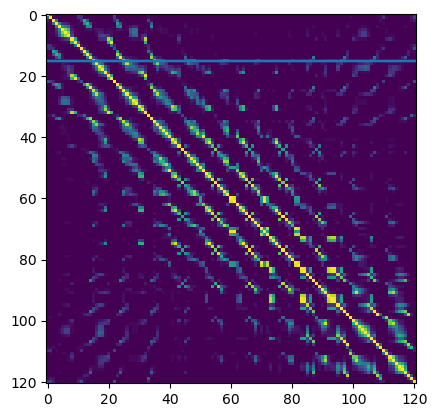

In [19]:
import numpy as np
arr = coo_sum[-1,:,:]
nodiag = arr.copy()
np.fill_diagonal(nodiag,0)
std_per_row = np.std(nodiag, axis=1)
min_per_row = np.min(nodiag, axis=1)
max_per_row = np.max(nodiag, axis=1)

print("Standard Deviation per Row at 5423:")

res = np.argsort(std_per_row)
print(res)
# print("Minimum per Row:")
print(np.argmax(min_per_row))

# print("Maximum per Row:")
# print(np.argmax(max_per_row))

plt.imshow(arr)
for i in res[:10]:
    plt.axhline(15)

 Histogram 

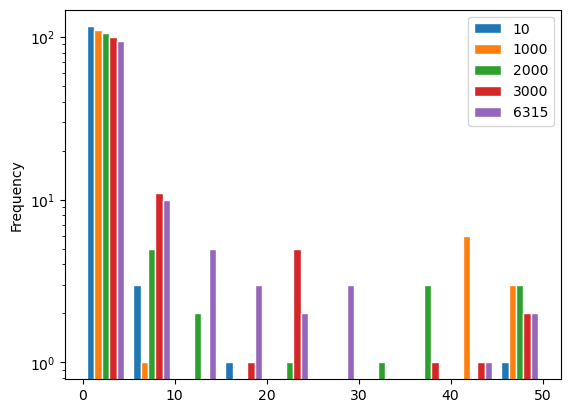

In [20]:
r = 15

cmap = matplotlib.colormaps["viridis_r"]
colors = [cmap(i) for i in np.linspace(0,1,coo_sum.shape[0])]

fig, ax = plt.subplots()

# [coo_sum[i, r, :] > 0]
res = [coo_sum[i, r, :] for i in range(coo_sum[:, r, :].shape[0])]

ax.hist(res,alpha=1,edgecolor="white", linewidth=1, stacked=False, density=False) #, color=colors[ss],histtype="barstacked", bins=10)
ax.set_xlabel("")
ax.set_yscale("log")

# ax.set_xscale("log")
ax.set_ylabel("Frequency")
legend_dict = {sample_sizes[i]:c for i,c in enumerate(colors)}
ax.legend(legend_dict)
plt.show()


Just take row and show

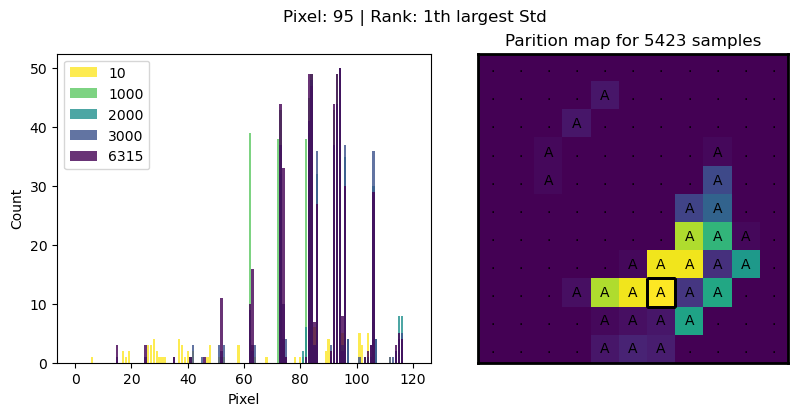

In [21]:
sorted_rows = np.argsort(std_per_row)[::-1]
i = 0
r = sorted_rows[i]

cmap = matplotlib.colormaps["viridis_r"]
colors = [cmap(i) for i in np.linspace(0,1,coo_sum.shape[0])]
scale = .7
fig, axs = plt.subplots(1,2,figsize=(12*scale,6*scale))

# [coo_sum[i, r, :] > 0]
res = [coo_sum[i, r, :].copy() for i in range(coo_sum[:, r, :].shape[0])]

# hist
legend_dict = {sample_sizes[i]:c for i,c in enumerate(colors)}
fig.suptitle(f"Pixel: {r+1} | Rank: {i+1}th largest Std")
for i, sample in enumerate(res):
    # sample[r] = 0
    axs[0].bar(range(len(sample)), sample,color=colors[i], alpha=.8)
    axs[0].set_xlabel('Pixel')
    axs[0].set_ylabel('Count')
axs[0].legend(legend_dict)

# parition map
myplot.interesting_pix_map(mcm_all_com[i], [r], nr_runs, digit=0,ax = axs[1],map_kwargs={"cbar":None})
axs[1].set_title("Parition map for 5423 samples")
plt.tight_layout()
plt.show()


[array([26,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        50, 50]),
 array([ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1, 38, 38,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0

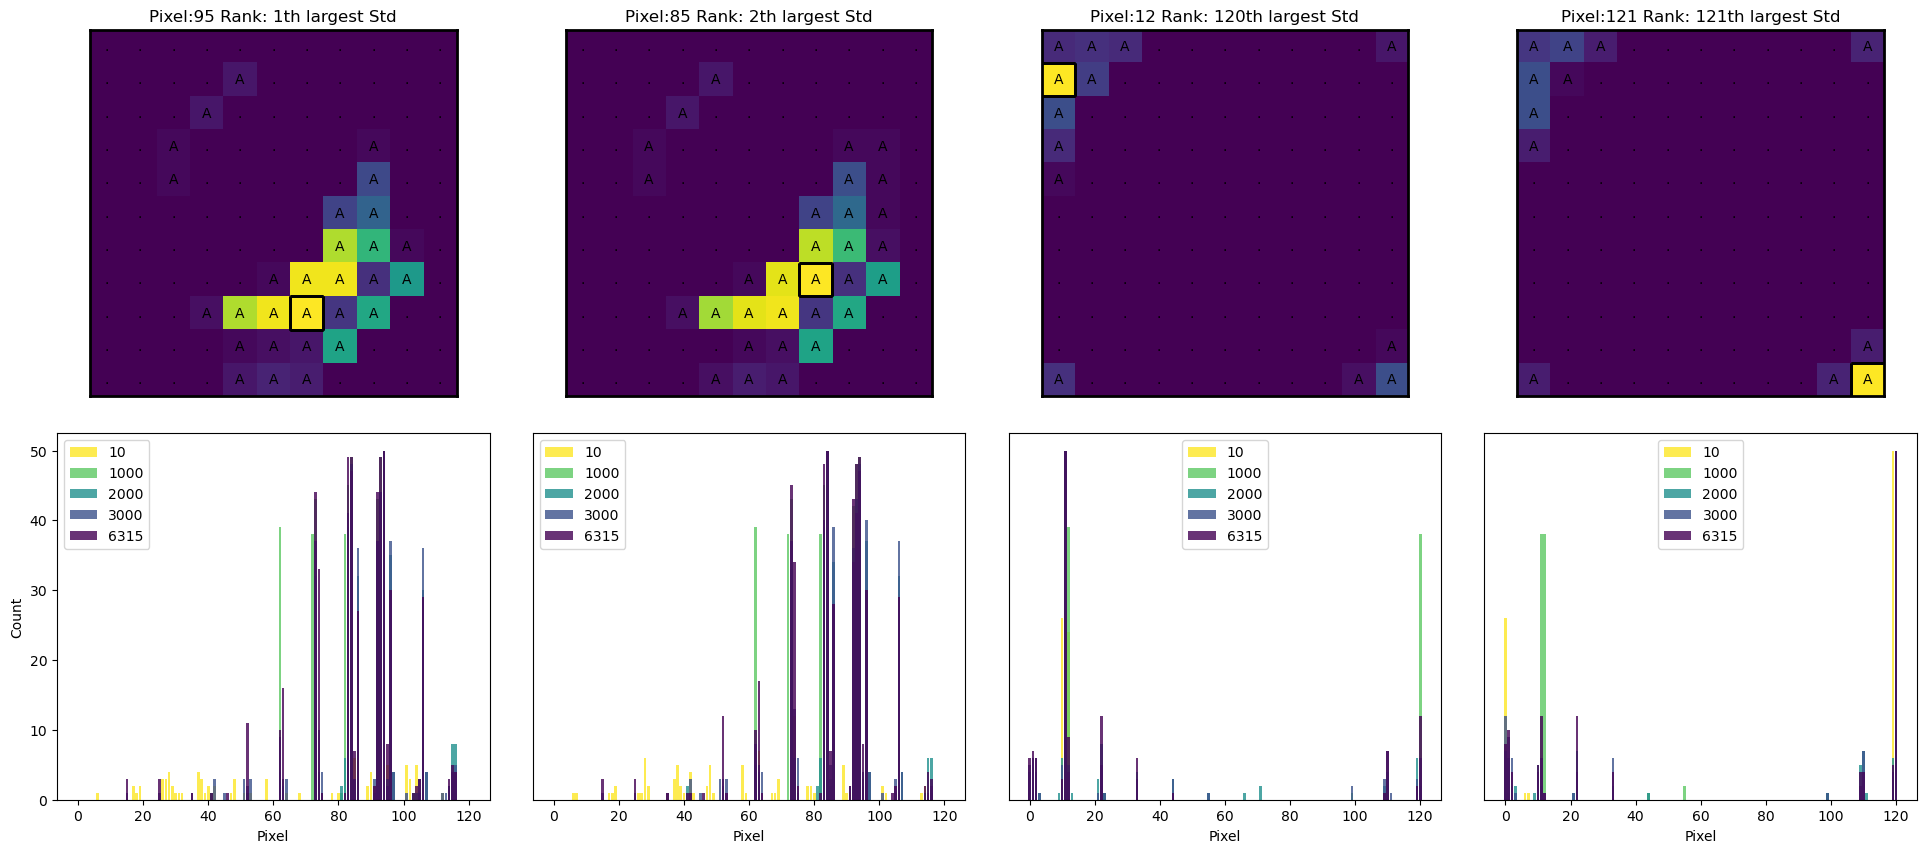

In [22]:
digit = 0

sorted_rows = np.argsort(std_per_row)[::-1]
ix_sel = [0,1,119,120]
# ix_sel = [30,59,60,90]

interesting_pix = sorted_rows[ix_sel]

scale = 2
fig, axs = plt.subplots(2, 4, figsize=(scale*12, scale*5), gridspec_kw = {'wspace':0.1, 'hspace':0.1})


axs = axs.flatten()

for i, ax in enumerate(axs[:4]): 
    myplot.interesting_pix_map(mcm_all_com[-1], [interesting_pix[i]], nr_runs, digit=0,ax = ax,map_kwargs={"cbar":None})
    ax.set_title(f'Pixel:{interesting_pix[i]+1} Rank: {ix_sel[i]+1}th largest Std') # fill rank in here


for i, ax in enumerate(axs[4:]):
    r = interesting_pix[i]
    res = [coo_sum[i, r, :].copy() for i in range(coo_sum[:, r, :].shape[0])]


    for j, sample in enumerate(res):
        # sample[r] = 0
        ax.bar(range(len(sample)), sample,color=colors[j], alpha=.8)
        
        ax.set_xlabel('Pixel')

    
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.get_yaxis().set_visible(False)

    ax.legend(legend_dict)


res

In [23]:
interesting_pix

array([ 94,  84,  11, 120])

#### Heatmap instead of hist

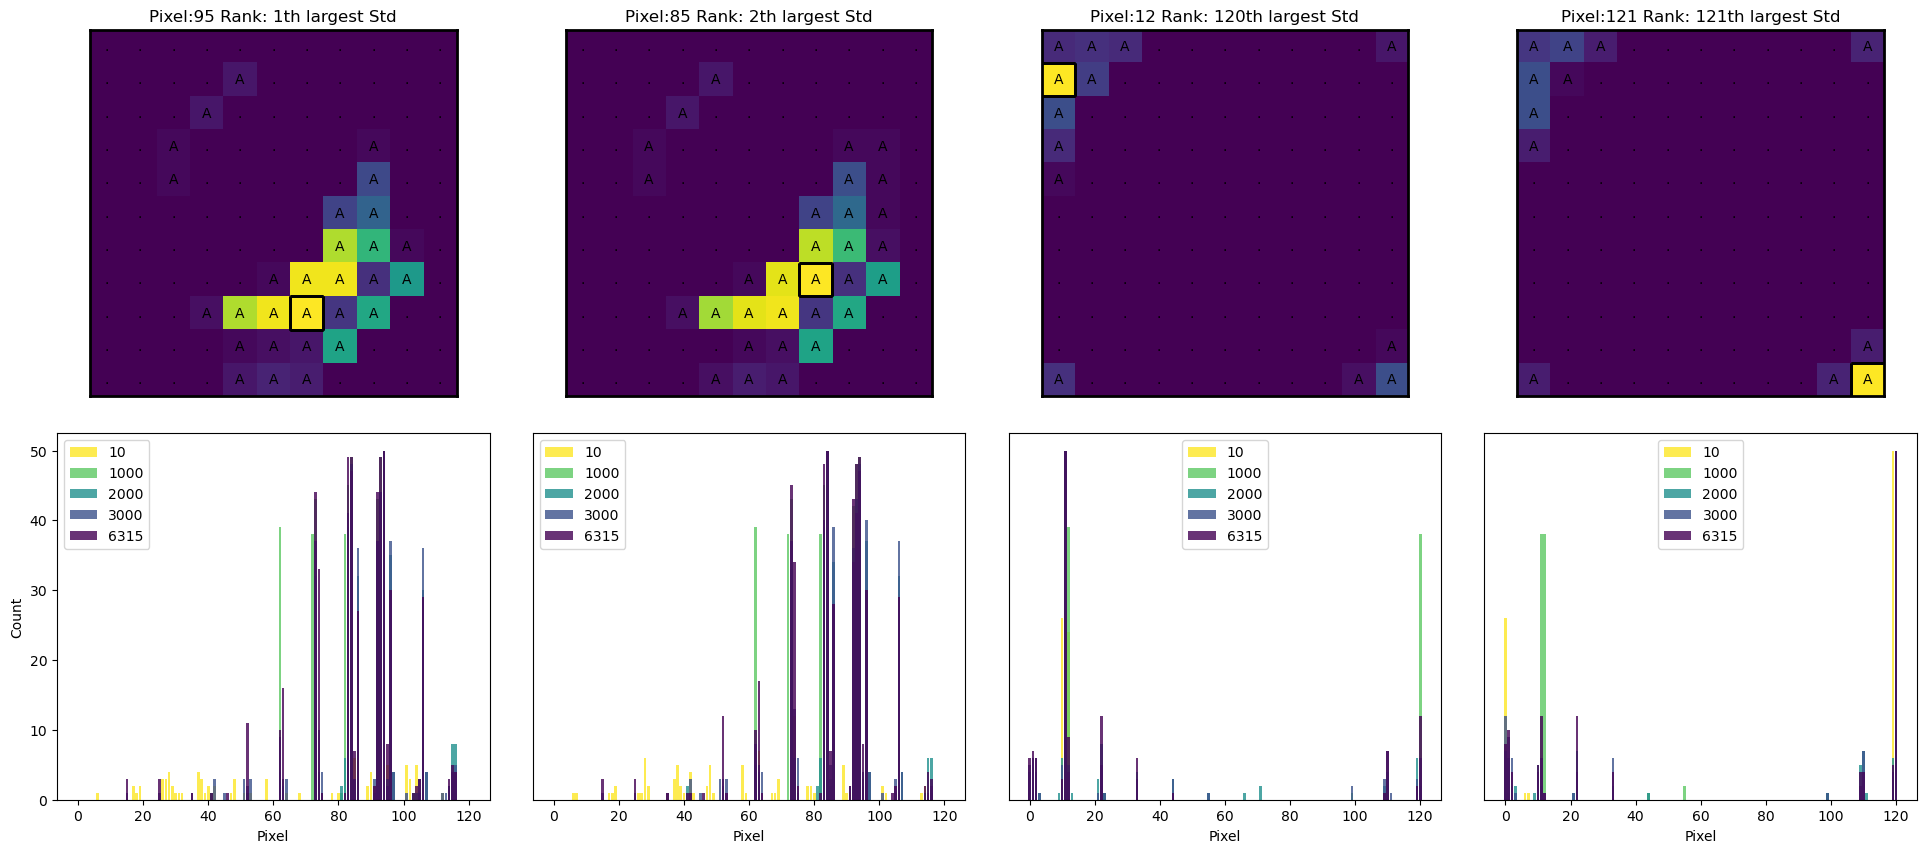

In [24]:
digit = 0

sorted_rows = np.argsort(std_per_row)[::-1]
ix_sel = [0,1,119,120]
# ix_sel = [30,59,60,90]

interesting_pix = sorted_rows[ix_sel]

scale = 2
fig, axs = plt.subplots(2, 4, figsize=(scale*12, scale*5), gridspec_kw = {'wspace':0.1, 'hspace':0.1})


axs = axs.flatten()

for i, ax in enumerate(axs[:4]): 
    myplot.interesting_pix_map(mcm_all_com[-1], [interesting_pix[i]], nr_runs, digit=0,ax = ax,map_kwargs={"cbar":None})
    ax.set_title(f'Pixel:{interesting_pix[i]+1} Rank: {ix_sel[i]+1}th largest Std') # fill rank in here


for i, ax in enumerate(axs[4:]):
    r = interesting_pix[i]
    res = [coo_sum[i, r, :].copy() for i in range(coo_sum[:, r, :].shape[0])]


    for j, sample in enumerate(res):
        # sample[r] = 0
        ax.bar(range(len(sample)), sample,color=colors[j], alpha=.8)
        
        ax.set_xlabel('Pixel')

    
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.get_yaxis().set_visible(False)

    ax.legend(legend_dict)


# res

Paritionmap ranking pixels by their std

In [25]:
# sorted_rows
std_per_row
np.argsort(std_per_row).argsort()



array([  4,   2,   9,  14,  17,  16,  22,  18,  42,  29,   7,   1,  13,
        40,  60,  73,  62,  21,  19,  71,  49,  32,   3,  26,  59,  82,
        75,  27,  35,  28, 101,  99,  51,   5,  48,  65,  66,  83,  70,
        68,  64, 107, 114,  52,  15,  43,  46,  84, 102,  67,  25,  63,
       104, 115, 103,  31, 110,  34,  97,  89,  76,  72,  30, 100, 116,
       106,  55, 112,  50,  81,  86,  74,  91, 111,  96, 113, 105,  53,
       109,  56,  39,  90,  88, 118, 119,  37,  61,  45,  36,  95,  69,
        94, 108, 117, 120,  54,  85,  92,  24,  12,  38,  98,  41,  33,
        47,  77,  79,  93,  23,  10,   6,  11,  57,  87,  44,  78,  80,
        58,  20,   8,   0])

(1.3236563435055486, 11.6086611455399)

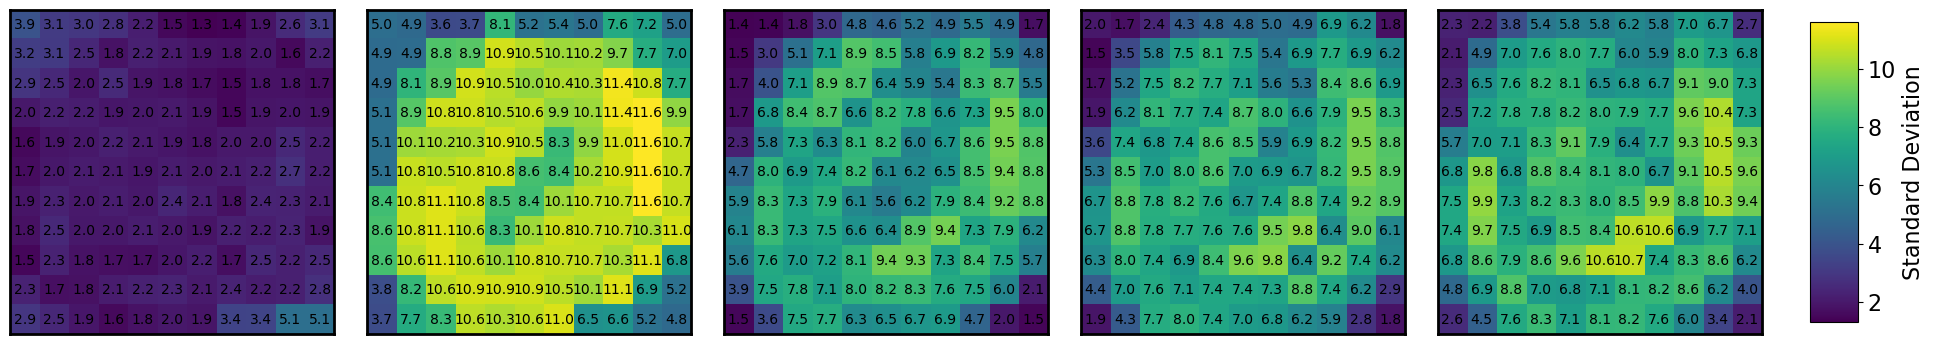

In [35]:
scale = 2
fig, axs = plt.subplots(1, 5, figsize=(scale*12, scale*5), gridspec_kw = {'wspace':0.1, 'hspace':0.1})

plot_std = []
for i,v in enumerate(sample_sizes):
    arr = coo_sum[i,:,:]
    nodiag = arr.copy()
    np.fill_diagonal(nodiag,0)
    std_per_row = np.std(nodiag, axis=1)
    # sorted_rows = np.argsort(std_per_row)[::-1]
    # ranks = sorted_rows.argsort()
    plot_std.append(std_per_row)



global_vbounds = np.min(np.array(plot_std)), np.max(np.array(plot_std))


for i,v in enumerate(sample_sizes):


    ax = axs[i]
    # ax.set_title(v)
    # im = myplot.partition_map(ax, ranks.reshape((11,11))+1,ranks.reshape((11,11))+1, None,cmap="viridis", normalise=False, cbar = False)
    im = myplot.partition_map(ax, plot_std[i].reshape((11,11)),plot_std[i].reshape((11,11)).round(1), None,cmap="viridis", normalise=False, cbar = False,global_vbounds=global_vbounds)



fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.83,
            wspace=0.02, hspace=0.02)
cbar_ax = fig.add_axes([0.85, 0.35, 0.02, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax)   
cbar.set_label('Pixel std. in co-occurance matrix',fontsize=12)
cbar.set_label("Standard Deviation",fontsize=16)
cbar.ax.tick_params(labelsize=16)

plt.savefig("./img/intpix_std.png", dpi=100,bbox_inches="tight")